In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load data
file_path = "C:/Users/mahmu/iCloudDrive/Study/Winter_24_25/ABDA/Project/dataset/AirQualityUCI.xlsx"
data = pd.read_excel(file_path)

In [3]:
len(data)

9357

In [3]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
15


In [4]:
data = data[data.columns[2:]]

In [5]:
data.head(20)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [6]:
data.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
# data_imputed = data.replace(0,data.mean(axis=0))
data_imputed = data.copy()

In [8]:
data_imputed.head(20)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [9]:
# Feature distribution checks
gamma_features = []
normal_features = []
for column in data.columns:
    if column != "Date" and column != "Time":
        print(f"[Info:] Working with column: {column}")
        skewness = stats.skew(data_imputed[column])
        kurtosis = stats.kurtosis(data_imputed[column])
        print(f"Skewness value: {skewness}")
        print(f"Kurtosis value: {kurtosis}")
        if skewness > 0 and kurtosis > 0:  # indicative of Gamma
            print(f"Column {column} can be used Gamma distribution")
            gamma_features.append(column)
        else:
            print(f"Column {column} can be used Normal distribution")
            normal_features.append(column)
        print("==============================")

[Info:] Working with column: CO(GT)
Skewness value: -1.6659123882972036
Kurtosis value: 0.7772485233134883
Column CO(GT) can be used Normal distribution
[Info:] Working with column: PT08.S1(CO)
Skewness value: -1.7208503331168468
Kurtosis value: 5.831752633254197
Column PT08.S1(CO) can be used Normal distribution
[Info:] Working with column: NMHC(GT)
Skewness value: 4.0751310428516
Kurtosis value: 18.85310427407573
Column NMHC(GT) can be used Gamma distribution
[Info:] Working with column: C6H6(GT)
Skewness value: -4.508051710755607
Kurtosis value: 19.17782064755835
Column C6H6(GT) can be used Normal distribution
[Info:] Working with column: PT08.S2(NMHC)
Skewness value: -0.7930258036330671
Kurtosis value: 2.367518335778291
Column PT08.S2(NMHC) can be used Normal distribution
[Info:] Working with column: NOx(GT)
Skewness value: 0.8251228942212316
Kurtosis value: 1.5041202985797852
Column NOx(GT) can be used Gamma distribution
[Info:] Working with column: PT08.S3(NOx)
Skewness value: -0

In [10]:
gamma_features

['NMHC(GT)', 'NOx(GT)']

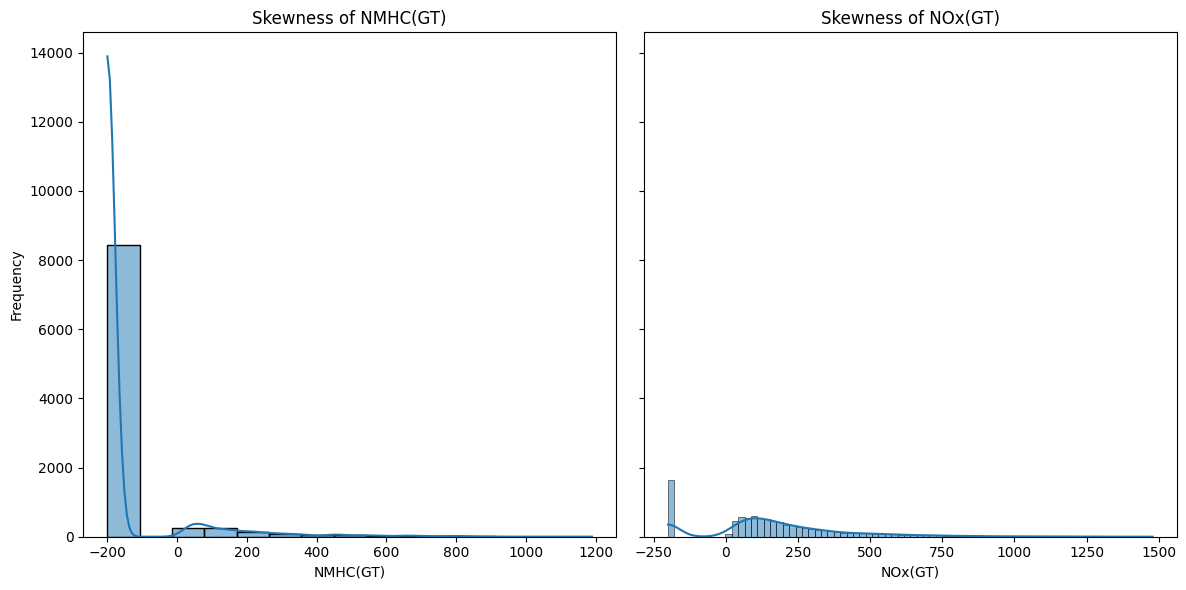

In [11]:
# Selecting the relevant columns and dropping rows with NaN values
relevant_columns = ['NMHC(GT)', 'NOx(GT)']
# data_filtered = data[relevant_columns].dropna()

# Plotting the skewness of 'NMHC(GT)' and 'NOx(GT)'
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# NMHC(GT)
sns.histplot(data_imputed['NMHC(GT)'], kde=True, ax=axes[0])
axes[0].set_title('Skewness of NMHC(GT)')
axes[0].set_xlabel('NMHC(GT)')
axes[0].set_ylabel('Frequency')

# NOx(GT)
sns.histplot(data_imputed['NOx(GT)'], kde=True, ax=axes[1])
axes[1].set_title('Skewness of NOx(GT)')
axes[1].set_xlabel('NOx(GT)')

plt.tight_layout()
plt.show()

In [12]:
normal_features

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

Plotting for: PT08.S1(CO)
Plotting for: C6H6(GT)
Plotting for: PT08.S2(NMHC)
Plotting for: PT08.S3(NOx)
Plotting for: NO2(GT)
Plotting for: PT08.S4(NO2)
Plotting for: PT08.S5(O3)
Plotting for: T
Plotting for: RH
Plotting for: AH


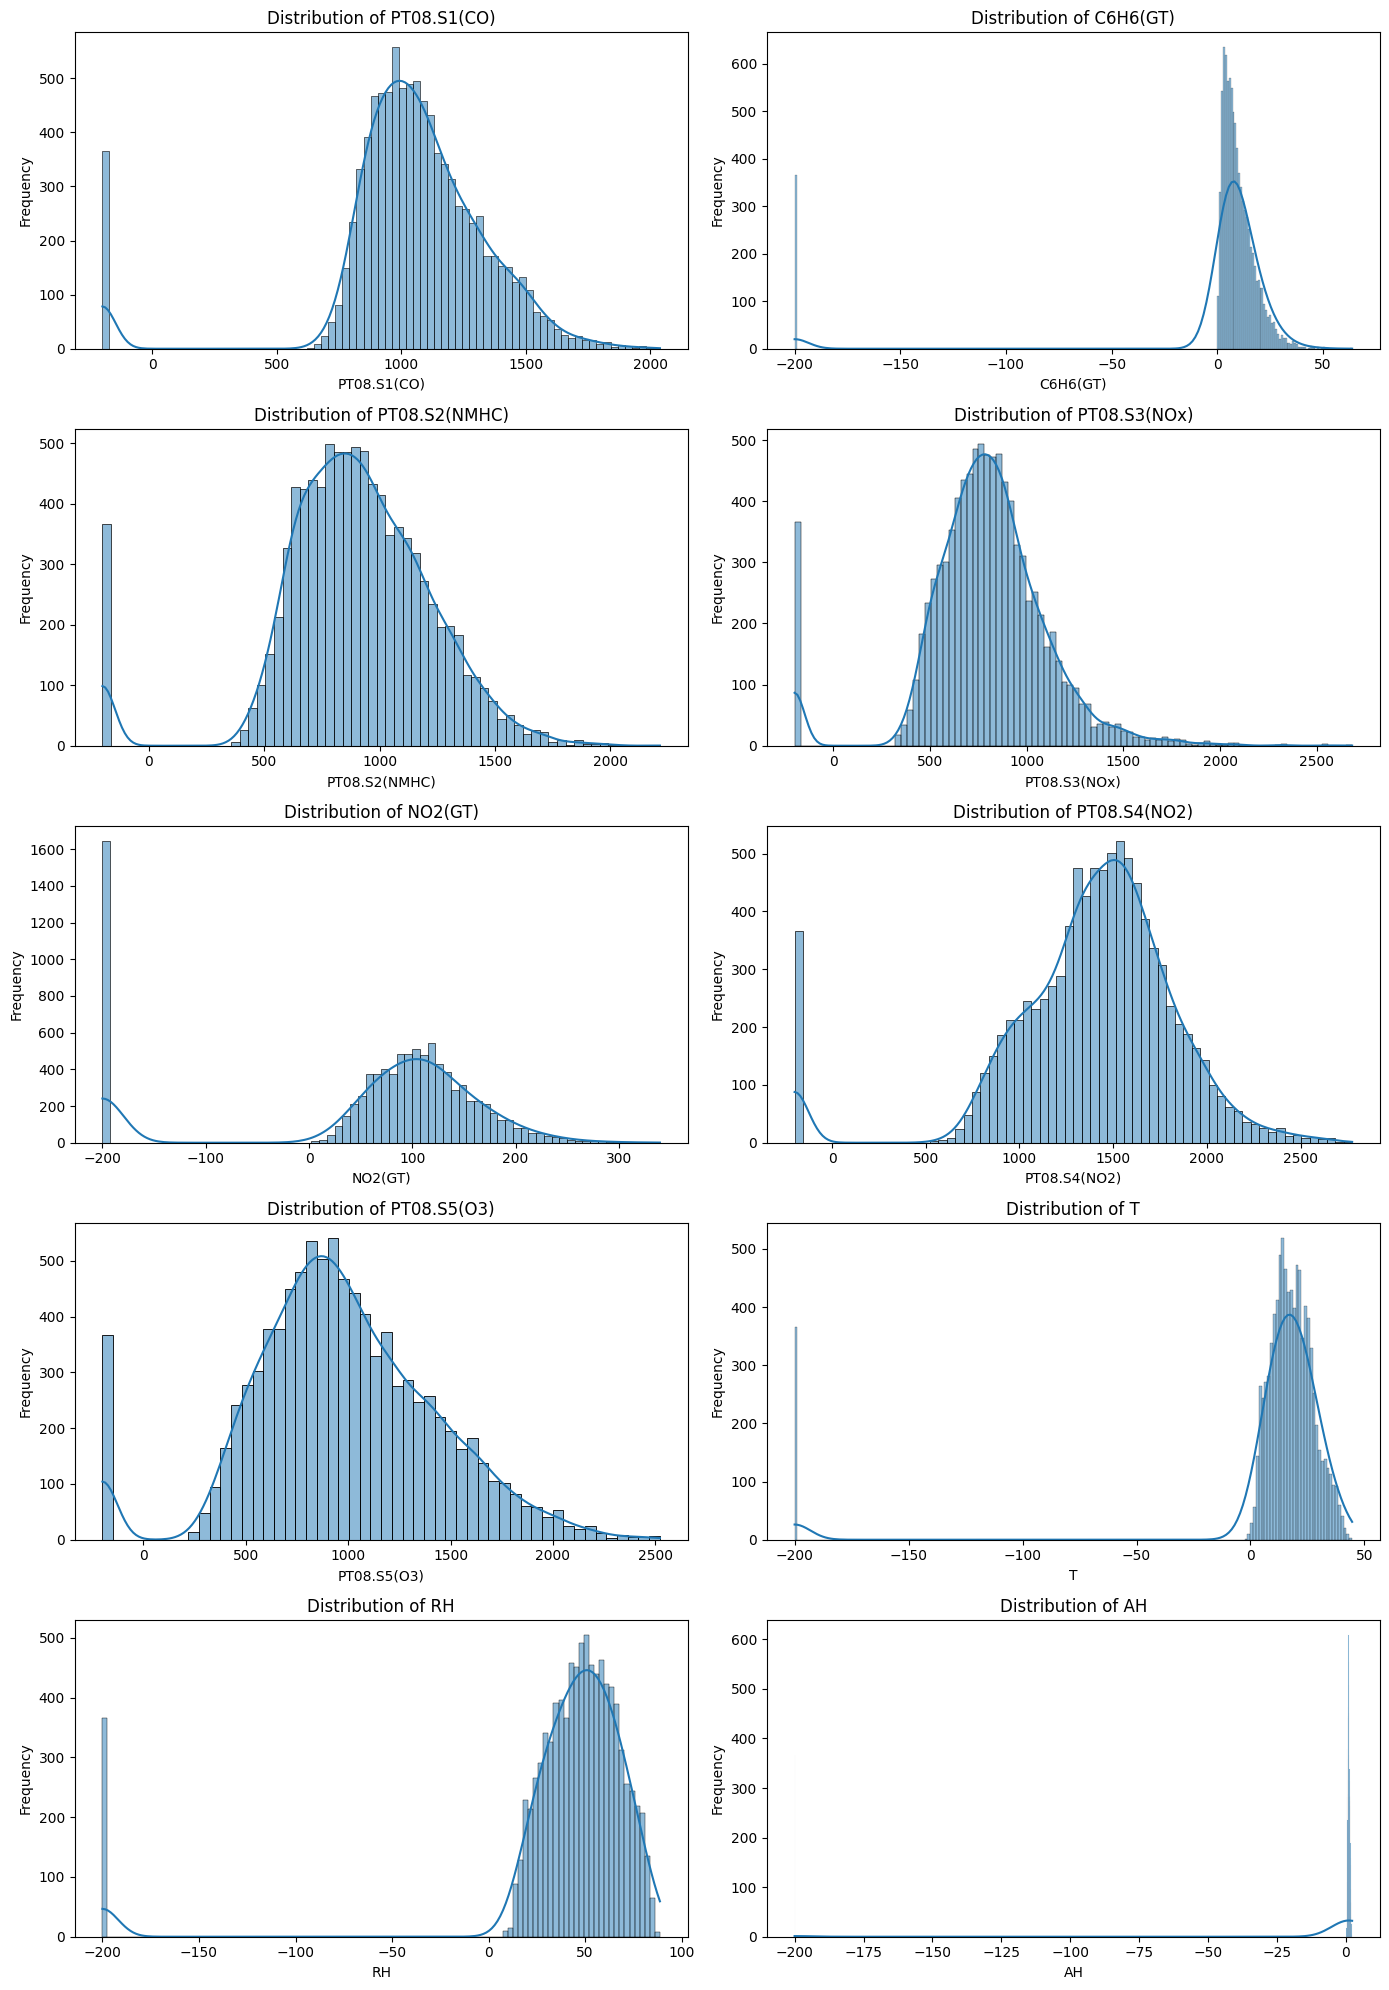

In [13]:
# Plotting each column
num_columns = len(normal_features[1:])
fig, axes = plt.subplots(5, 2, figsize=(14, 20))  # Adjusting for a grid layout

axes = axes.flatten()

for i, col in enumerate(normal_features[1:]):
    print(f"Plotting for: {col}")
    sns.histplot(data_imputed[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
data_imputed = data_imputed[(data_imputed >= 0).all(axis=1)]

In [15]:
data_imputed.head(20)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
11,0.7,1066.00,8,1.133431,512.00,16.0,1918.00,28.0,1182.00,421.75,11.000,56.175000,0.736560


In [16]:
# Feature distribution checks
gamma_features = []
normal_features = []
for column in data_imputed.columns:
    if column != "Date" and column != "Time":
        print(f"[Info:] Working with column: {column}")
        skewness = stats.skew(data_imputed[column])
        kurtosis = stats.kurtosis(data_imputed[column])
        print(f"Skewness value: {skewness}")
        print(f"Kurtosis value: {kurtosis}")
        if skewness > 0 and kurtosis > 0:  # indicative of Gamma
            print(f"Column {column} can be used Gamma distribution")
            gamma_features.append(column)
        else:
            print(f"Column {column} can be used Normal distribution")
            normal_features.append(column)
        print("==============================")

[Info:] Working with column: CO(GT)
Skewness value: 1.0642744582925265
Kurtosis value: 1.0695737089840955
Column CO(GT) can be used Gamma distribution
[Info:] Working with column: PT08.S1(CO)
Skewness value: 0.5641621565523224
Kurtosis value: -0.10385335800595996
Column PT08.S1(CO) can be used Normal distribution
[Info:] Working with column: NMHC(GT)
Skewness value: 1.482649849695712
Kurtosis value: 1.9555820939615867
Column NMHC(GT) can be used Gamma distribution
[Info:] Working with column: C6H6(GT)
Skewness value: 0.9972762580698271
Kurtosis value: 0.7960728801893211
Column C6H6(GT) can be used Gamma distribution
[Info:] Working with column: PT08.S2(NMHC)
Skewness value: 0.35042076901032293
Kurtosis value: -0.42190146038080467
Column PT08.S2(NMHC) can be used Normal distribution
[Info:] Working with column: NOx(GT)
Skewness value: 0.8645441425485664
Kurtosis value: 0.45617988228566553
Column NOx(GT) can be used Gamma distribution
[Info:] Working with column: PT08.S3(NOx)
Skewness va

In [17]:
gamma_features

['CO(GT)',
 'NMHC(GT)',
 'C6H6(GT)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'T',
 'AH']

In [18]:
normal_features

['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S5(O3)', 'RH']

Validating the Transformation

In [19]:
# Function to perform distribution testing
def test_distribution(df, columns, distribution_type):
    results = {}
    for col in columns:
        if distribution_type == 'gamma':
            # Fit the Gamma distribution and perform the Kolmogorov-Smirnov test
            shape, loc, scale = stats.gamma.fit(df[col])
            ks_stat, p_value = stats.kstest(df[col], 'gamma', args=(shape, loc, scale))
        elif distribution_type == 'normal':
            # Perform the Shapiro-Wilk test for normality
            ks_stat, p_value = stats.shapiro(df[col])
        else:
            raise ValueError("Unsupported distribution type")
        results[col] = {"KS Statistic": ks_stat, "P-Value": p_value}
    return results

In [20]:
# Columns to test
print(f"Gamma features: {gamma_features}")
print(f"Normal features: {normal_features}")

Gamma features: ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'T', 'AH']
Normal features: ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S5(O3)', 'RH']


In [21]:
# Test distributions
gamma_test_results = test_distribution(data_imputed, gamma_features, 'gamma')
normal_test_results = test_distribution(data_imputed, normal_features, 'normal')

# Combine results into dataframes for better readability
gamma_results_df = pd.DataFrame(gamma_test_results).T
normal_results_df = pd.DataFrame(normal_test_results).T

In [22]:
gamma_results_df.head()

,KS Statistic,P-Value
CO(GT),0.039043,0.156478
NMHC(GT),0.048141,0.041869
C6H6(GT),0.033196,0.314890
NOx(GT),0.018150,0.943504
PT08.S3(NOx),0.020957,0.853030


In [23]:
normal_results_df.head(10)

,KS Statistic,P-Value
PT08.S1(CO),0.970244,6.029676e-12
PT08.S2(NMHC),0.983160,3.708912e-08
NO2(GT),0.998090,4.872238e-01
PT08.S5(O3),0.985068,1.835041e-07
RH,0.982889,2.981316e-08


Histogram and Q-Q Plot Validation for Transformation

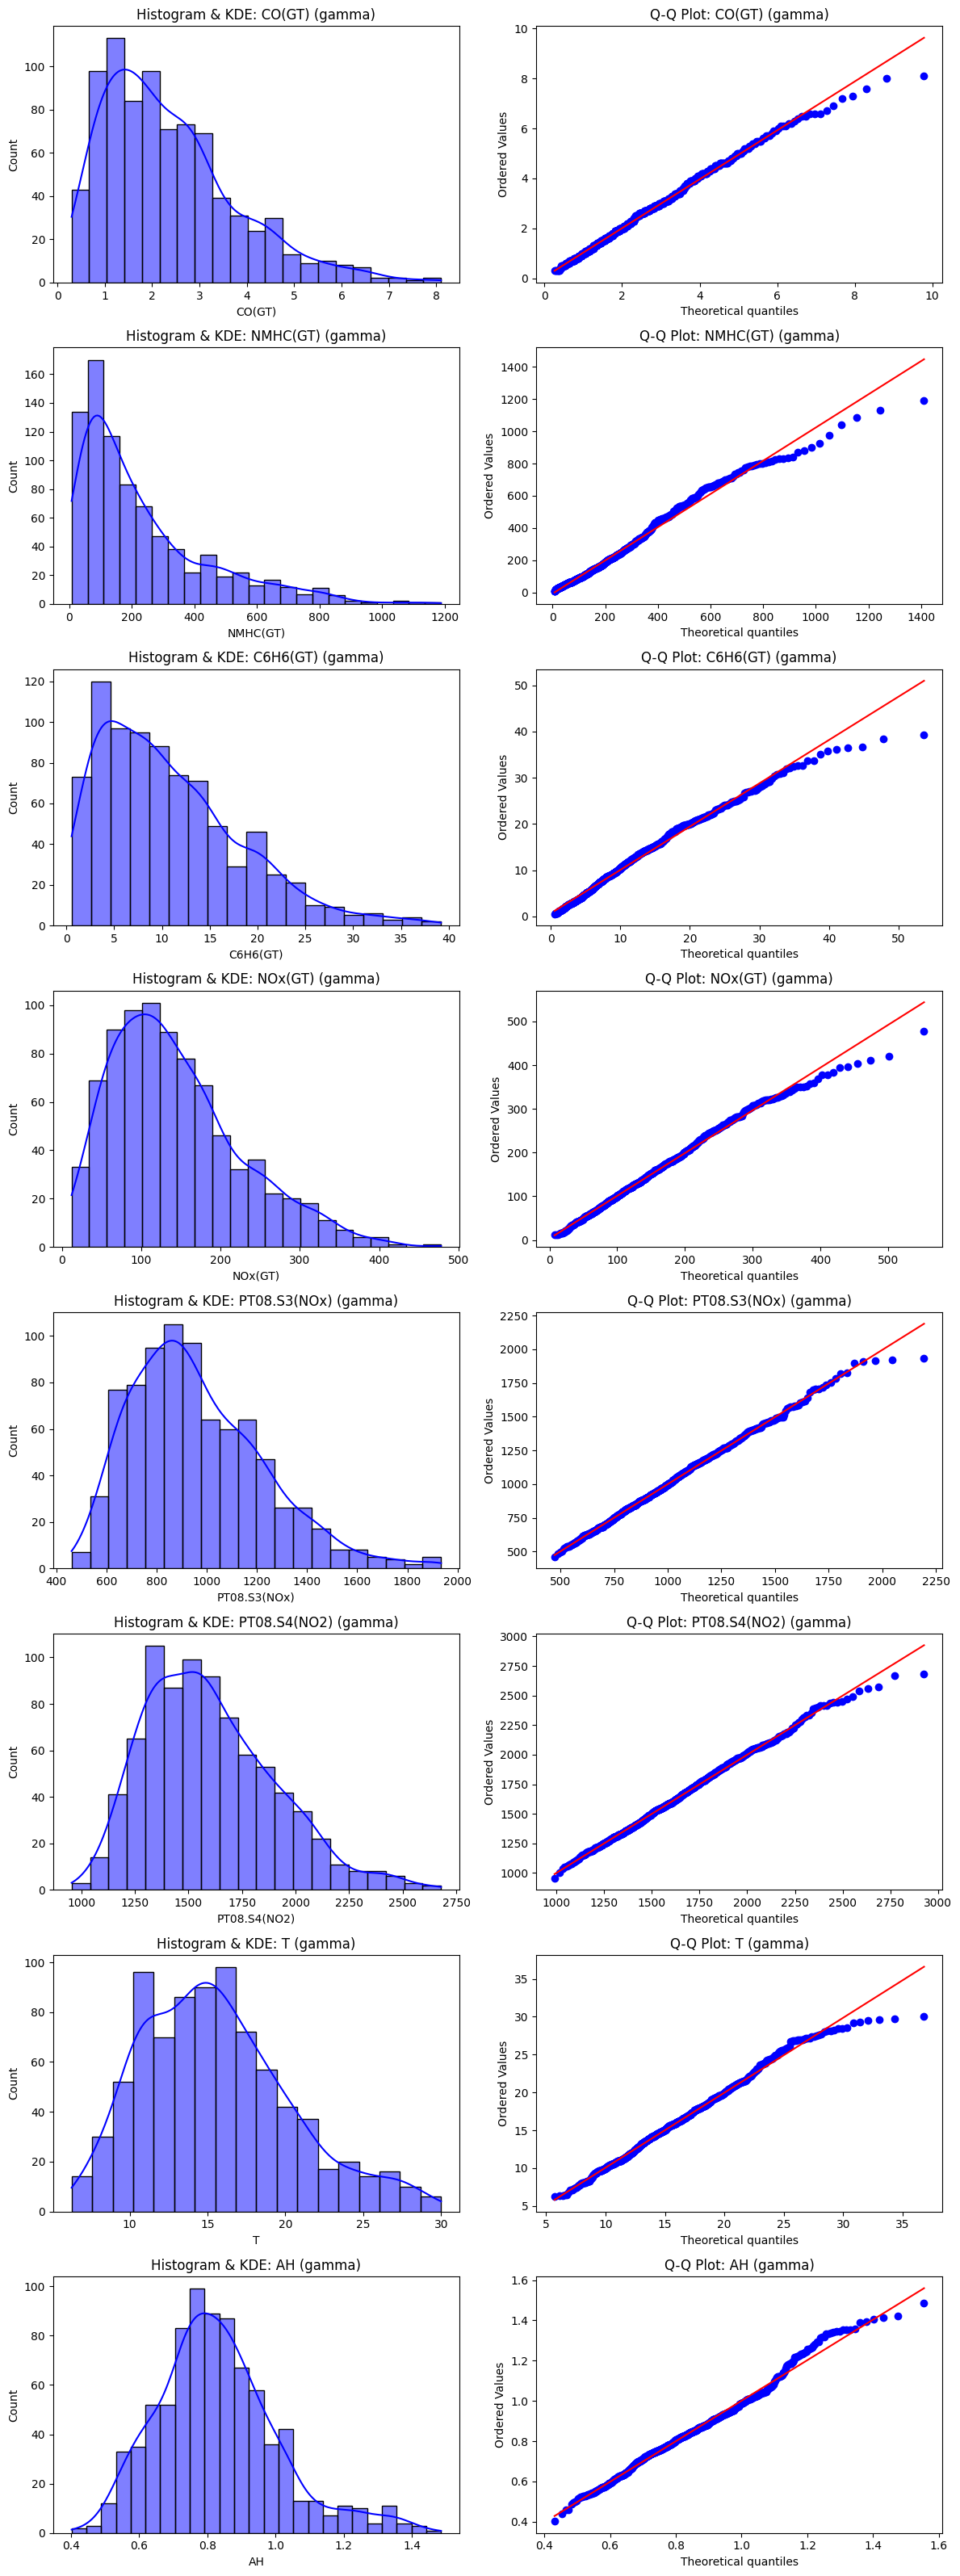

In [24]:
# Updated function for Gamma Q-Q plots with parameter estimation
def plot_distribution_diagnostics(df, columns, distribution_type):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 4))
    for i, col in enumerate(columns):
        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=axes[i, 0], color='blue')
        axes[i, 0].set_title(f'Histogram & KDE: {col} ({distribution_type})')
        axes[i, 0].set_xlabel(col)
        
        # Q-Q Plot
        if distribution_type == 'gamma':
            # Estimate parameters for Gamma
            shape, loc, scale = stats.gamma.fit(df[col])
            stats.probplot(df[col], dist="gamma", sparams=(shape, loc, scale), plot=axes[i, 1])
        elif distribution_type == 'normal':
            stats.probplot(df[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot: {col} ({distribution_type})')
    
    plt.tight_layout()
    plt.show()

# Visualize Gamma-distributed columns
plot_distribution_diagnostics(data_imputed, gamma_features, 'gamma')

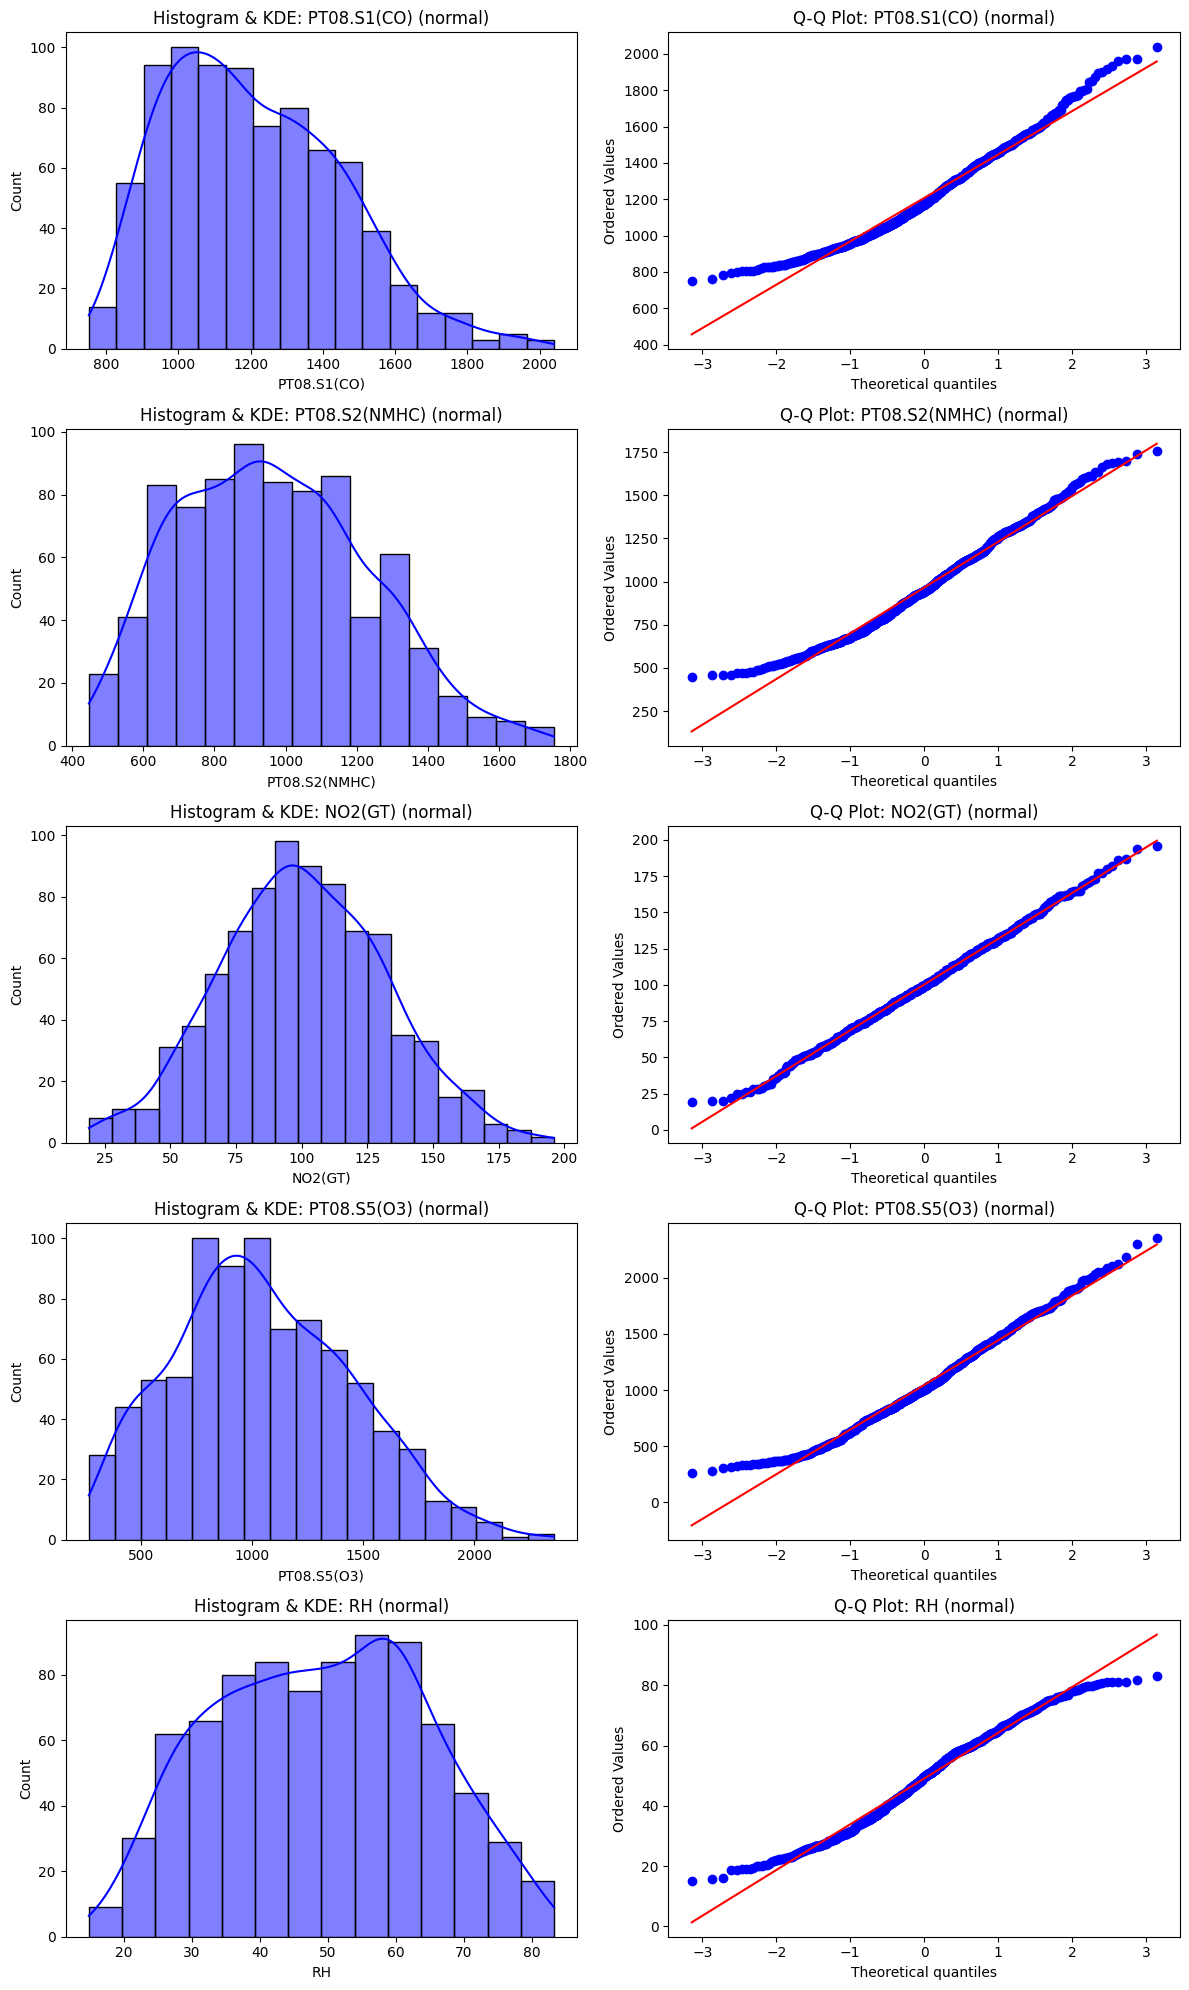

In [25]:
# Visualize Normal-distributed columns
plot_distribution_diagnostics(data_imputed, normal_features, 'normal')

In [26]:
data_dir = os.path.dirname(os.path.dirname(os.getcwd()))
data_dir = os.path.join(data_dir, "dataset")

In [27]:
data_imputed.to_excel(f"{data_dir}/data_transformed.xlsx")